In [90]:
import numpy as np 
import matplotlib.pyplot as plt 

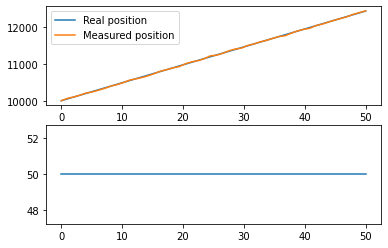

In [93]:
#Example: We have constant velocity, and should track position in 1 dim 
alpha = 0.5
beta = 0.2
dt = 1 
x0 = 10000 #m
v0 = 40 #m/s
sd_x = 10

N_elements = 50

t_real = np.linspace(0, int(N_elements*dt), N_elements)
v_real = np.ones(N_elements)*50 
#x_real = [x0 + v*dt*i for i, v in enumerate(v_real)]

x_real = [x0]
for v in v_real[:-1]: 
    x_real.append(x_real[-1] + dt*v)


x_meas = [x + np.random.normal(0, sd_x) for x in x_real] #sd = 100 

fig, ax = plt.subplots(2, 1)
ax[0].plot(t_real, x_real, label='Real position') 
ax[0].plot(t_real, x_meas, label="Measured position") 
ax[0].legend() 

ax[1].plot(t_real, v_real)
plt.show()


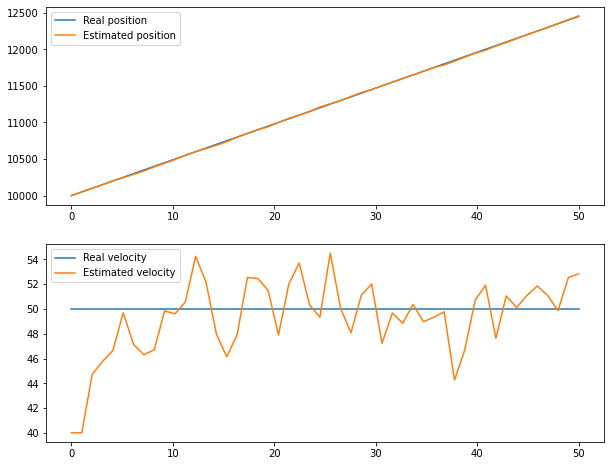

In [94]:
#N = 0 - initialization 
x_esti = [x0] 
v_esti = [v0] 

x_pred = [x0]
v_pred = [v0]
x_pred.append(x0 + v0*dt)
v_pred.append(v0)

for i in range(1, N_elements): 
    x_m = x_meas[i] #Gets the measured value 
    v_m = (x_m - x_esti[i-1])/dt #Get "measured" velocity
    
    #State update equations: 
    x_esti.append(x_pred[i] + alpha*(x_m - x_pred[i]))
    v_esti.append(v_pred[i] + beta*(v_m - v_pred[i]))
    
    #State prediction/extrapolation 
    x_pred.append(x_esti[i] + v_esti[i]*dt)
    v_pred.append(v_esti[i])
    
    
fig, ax = plt.subplots(2, 1)
ax[0].plot(t_real, x_real, label='Real position') 
#ax[0].plot(t_real, x_meas, label="Measured position") 
#ax[0].plot(t_real, x_pred[:-1], label="Predicted position")
ax[0].plot(t_real, x_esti, label="Estimated position") 
ax[0].legend() 

ax[1].plot(t_real, v_real, label='Real velocity')
ax[1].plot(t_real, v_pred[:-1], label="Estimated velocity") 
ax[1].legend()

fig.set_figwidth(10)
fig.set_figheight(8)
plt.show()
    